### __Understanding Distribution Through Sampling__

To complete this assignment, create a code cell that:

1. Creates a number of subplots using the pyplot subplots or matplotlib gridspec functionality.
2. Creates an animation, pulling between 100 and 1000 samples from each of the random variables (x1, x2, x3, x4) for each plot and plotting this as we did in the lecture on animation.
3. Bonus: Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.

Tips:

1. Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
2. Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
3. Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

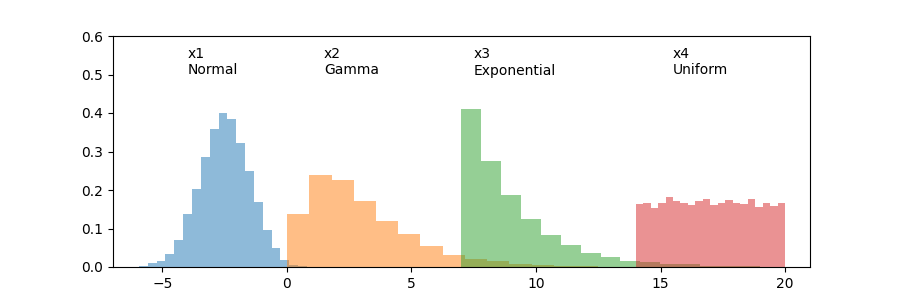

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

_Practice_

In [6]:
# importing necessary libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import pandas as pd

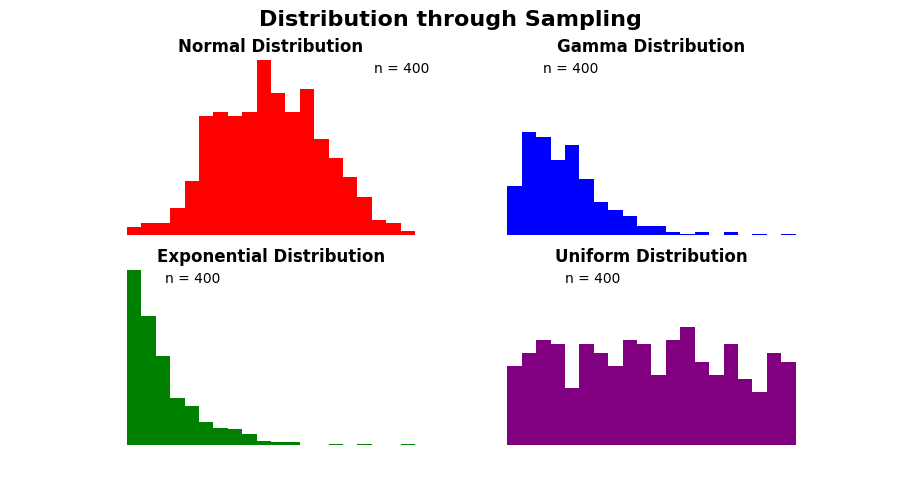

In [8]:
# setting global variables
n = 400
names =['Normal','Gamma','Exponential','Uniform']
colours = ['red','blue','green','purple']
y_min = 0
y_max = 0.4

# making a list of generated random values
x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)
x4 = np.random.uniform(1,6, n)
samples = [x1,x2,x3,x4]

# making a 2x2 subplot for the list of generated random values.
fig,axs = plt.subplots(2,2,figsize=(9,5),sharey=True)

# set the supertitle of the chart
fig.suptitle('Distribution through Sampling', fontsize=16,fontweight='bold')

axs = axs.flatten()

def update(curr):
    if curr>=n:
        a.event_source.stop() 
    
    # plotting the graph
    for i,ax in enumerate(axs):
        ax.cla()
        ax.hist(samples[i][:curr],density=True,bins=20,color=colours[i])
        ax.set_title('{} Distribution'.format(names[i]),fontweight='bold')
        ax.annotate('n = {}'. format(curr), [2,0.37])
        # set fixed y limits
        ax.set_ylim(y_min,y_max)
        #removing the y axis for each subplot
        ax.set_yticks([])
        #removing the x axis for each subplot
        ax.set_xticks([])
        #removing the spines 
        for spine in ax.spines.values():
            spine.set_visible(False) 

a = animation.FuncAnimation(fig,update,interval=10,repeat=False, frames=np.arange(1, n + 1),blit = True)  

a.save('distribution_animation.mp4', writer='ffmpeg', fps=20)
plt.show()          